In [1]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_high_error.xlsx',
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_low_error.xlsx',
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD_high_error.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD_low_error.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_high_error.xlsx',
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_low_error.xlsx',
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD_high_error.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD_low_error.xlsx']

In [3]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    error_ = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    df_x['error_performance'] = error_    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['decoding_item'] = df_target['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target['training_item'] = df_target['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    error_= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    df_x['error_performance'] = error_    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['decoding_item'] = df_target_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target_shuff['training_item'] = df_target_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [9]:
df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for error_perf in ['high', 'low']:
                    for t in df.times.unique(): 
                        #
                        decoding_item='distractor'
                        #
                        dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                               ( df['condition']==cond) & (df['subject']==subj) &  
                               ( df['training_item']==training_item) & 
                               ( df['decoding_item']== decoding_item) & 
                               ( df['error_performance']== error_perf)]
                        #
                        dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                               ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                               ( df_shuff['training_item']==training_item)  & 
                               ( df_shuff['decoding_item']== decoding_item) & 
                               ( df_shuff['error_performance']== error_perf)].decoding
                        #
                        decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                        df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item, error_perf] )   
                        ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item', 'error_perf']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


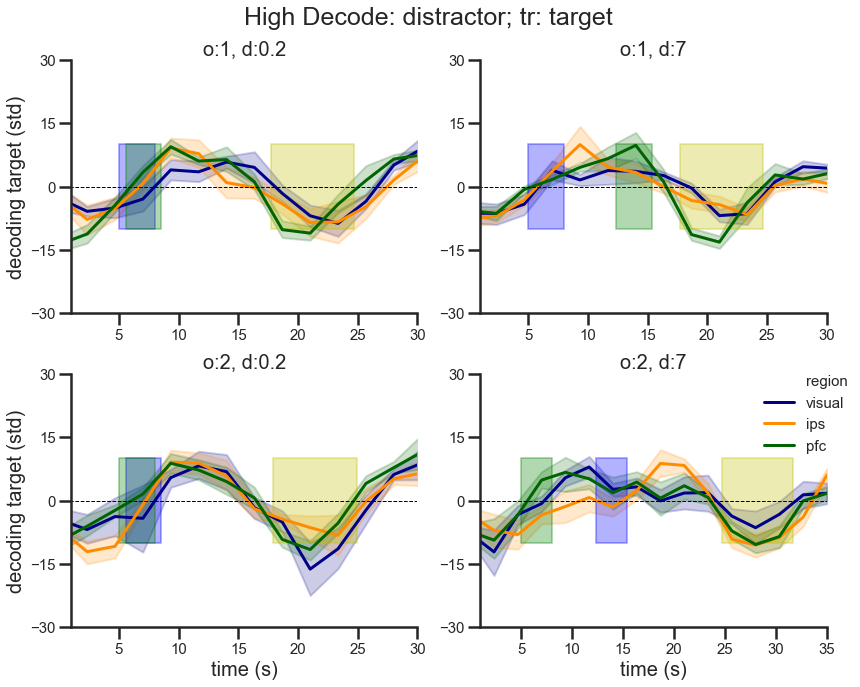

In [10]:
df_x = df_time_target.loc[(df_time_target['training_item']=='target') 
                          & (df_time_target['error_perf']=='high')]
tiemcourse(df_x , 'High Decode: distractor; tr: target', ylims=[-30,30])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


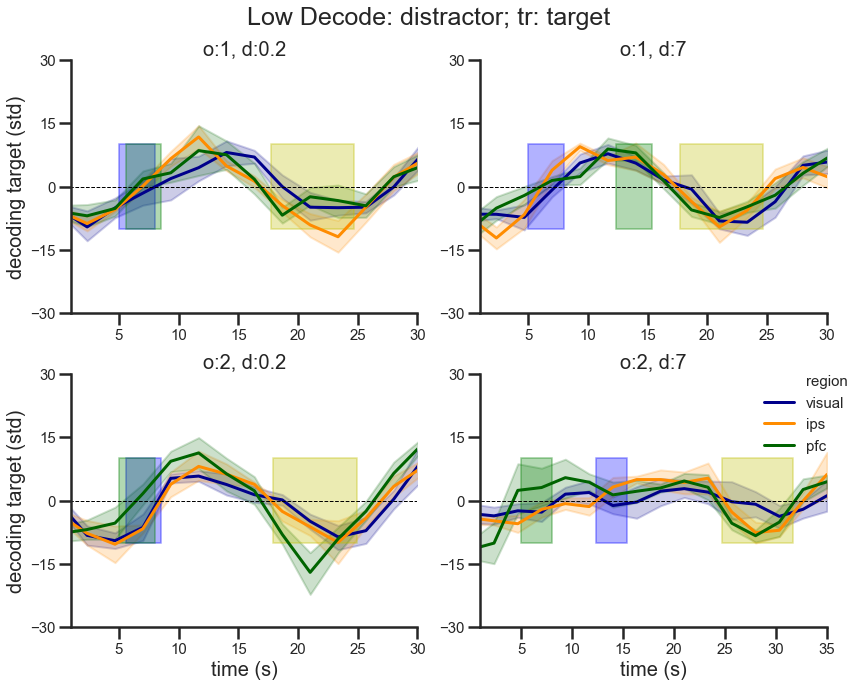

In [11]:
df_x = df_time_target.loc[(df_time_target['training_item']=='target') 
                          & (df_time_target['error_perf']=='low')]
tiemcourse(df_x , 'Low Decode: distractor; tr: target', ylims=[-30,30])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


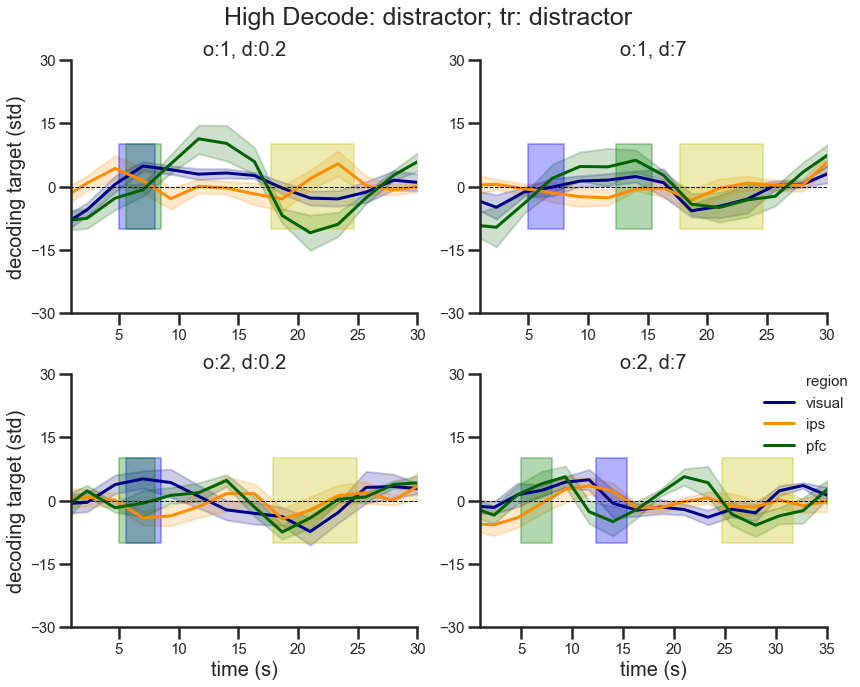

In [12]:
df_x = df_time_target.loc[(df_time_target['training_item']=='distractor') 
                         & (df_time_target['error_perf']=='high')]
tiemcourse(df_x , 'High Decode: distractor; tr: distractor', ylims=[-30,30])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


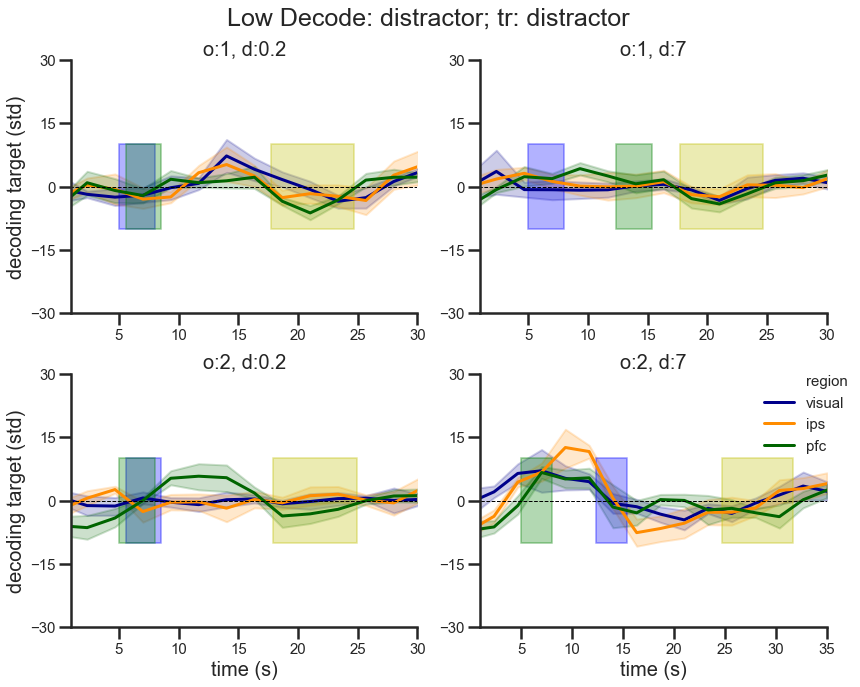

In [13]:
df_x = df_time_target.loc[(df_time_target['training_item']=='distractor') 
                         & (df_time_target['error_perf']=='low')]
tiemcourse(df_x , 'Low Decode: distractor; tr: distractor', ylims=[-30,30])